<h1 align="center">Introduction to Machine Learning - 25737-2</h1>
<h4 align="center">Dr. R. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>


**<font color='red'>Plagiarism is strongly prohibited!</font>**


**Student Name**: Ali Yousefi

**Student ID**: 99109111



# ****Support Vector Machines****

In this notebook, you will implement SVM for three datasets. You will become more familiar with the Soft-Margin SVM and the Kernel trick, which makes SVM extremely powerful.

Before we start our implementation, you must be comfortable with the theoretical details of the Soft-Margin SVM as an optimization problem and be able to derive the dual formulation for this problem. In the next sections, you will solve the dual optimization problem for all datasets using the CVXPY library, which has been developed for solving convex optimization problems. To get more familiar with CVXPY programming, you can use this [link](https://www.cvxpy.org).

This is the primal formulation for the Soft-Margin SVM for linearly separable data with slack variables $\xi_i \ge 0$:

\begin{equation*}
\begin{aligned}
& {\text{min.}}
& & \frac{1}{2} \|w\|^2 + C \sum_{i=1}^{N} \xi_i \\
& \text{s.t.}
& & y_i(w^T x_i + b) \geq 1 - \xi_i, \; i = 1, \ldots, N \\
& & & \xi_i \geq 0, \; i = 1, \ldots, N
\end{aligned}
\end{equation*}

Where $w$ represents the weight vector, $b$ is the bias term, and $C$ is the regularization parameter controlling the trade-off between a wide margin and misclassification.

**Theoretical Questions:**

1) Derive the dual optimizat
ion problem for the Soft-Margin SVM.

2) How do we calculate the weights and bias ($w$ and $b$) using the dual problem optimum points?

3) How do we classify new data points using the optimal weights and bias?

<font color='green'>Write down your answers as markdown here.</font>
1) Deriving the Dual Optimization Problem for Soft-Margin SVM:

The primal optimization problem for Soft-Margin SVM is:

\begin{align*}
&\min_{w, b, \xi_i} \frac{1}{2}\|w\|^2 + C\sum_{i=1}^{N}\xi_i \\
&\text{s.t.} \quad y_i(w^Tx_i + b) \geq 1 - \xi_i, \quad \xi_i \geq 0, \quad i = 1, \ldots, N
\end{align*}

To derive the dual problem, we first form the Lagrangian:

\begin{align*}
L(w, b, \xi, \alpha, \beta) &= \frac{1}{2}\|w\|^2 + C\sum_{i=1}^{N}\xi_i + \sum_{i=1}^{N}\alpha_i(1 - \xi_i - y_i(w^Tx_i + b)) - \sum_{i=1}^{N}\beta_i\xi_i
\end{align*}

where $\alpha_i \geq 0$ and $\beta_i \geq 0$ are the Lagrange multipliers.

Next, we minimize the Lagrangian with respect to $w$, $b$, and $\xi_i$:

\begin{align*}
\frac{\partial L}{\partial w} &= w - \sum_{i=1}^{N}\alpha_iy_ix_i = 0 \implies w = \sum_{i=1}^{N}\alpha_iy_ix_i \\
\frac{\partial L}{\partial b} &= -\sum_{i=1}^{N}\alpha_iy_i = 0 \\
\frac{\partial L}{\partial \xi_i} &= C - \alpha_i - \beta_i = 0 \implies \beta_i = C - \alpha_i
\end{align*}

Substituting these back into the Lagrangian, we get the dual optimization problem:

\begin{align*}
&\max_{\alpha_i} \sum_{i=1}^{N}\alpha_i - \frac{1}{2}\sum_{i=1}^{N}\sum_{j=1}^{N}\alpha_i\alpha_jy_iy_jx_i^Tx_j \\
&\text{s.t.} \quad 0 \leq \alpha_i \leq C, \quad i = 1, \ldots, N
\end{align*}

2) Calculating Weights and Bias from Dual Problem Optimum:

From the optimality conditions, we have:
$$w = \sum_{i=1}^{N}\alpha_iy_ix_i$$

To find the bias $b$, we can use the fact that for any support vector $x_i$ with $\alpha_i > 0$, we have:
$$y_i(w^Tx_i + b) = 1 - \xi_i$$
Rearranging, we get:
$$b = \frac{1}{|\{i : \alpha_i > 0\}|}\sum_{i:\alpha_i > 0}y_i - w^Tx_i$$

3) Classifying New Data Points:

To classify a new data point $x$, we use the decision function:
$$f(x) = \text{sign}(w^Tx + b)$$

Substituting the expressions for $w$ and $b$, we get:
$$f(x) = \text{sign}\left(\sum_{i=1}^{N}\alpha_iy_ix_i^Tx + b\right)$$

This allows us to classify new data points using the optimal weights and bias obtained from the dual problem.


Sometimes, the data is not linearly separable. Therefore, the previous formulation of the Soft-Margin SVM does not give a good accuracy for the classification problem. The Kernel trick is a technique used in such situations. Consider $x$ as your input features with dimension $p$. One can use function $\phi: R^p → R^d$ to map the input features to another space with dimension $d$. Finding good $\phi$ such that data points become near linearly separable makes the previous formulation of the problem and its dual useful by replacing $\phi(x_i)$ for $x_i$ in the problem definition. The function $\phi(x)$ can even be a mapping to an infinite-dimensional space.

If you have found the correct dual form of the Soft-Margin SVM in the previous formulation, you can see that the terms $x_i^T x_j$ will appear in the problem formulation and the prediction rule. These terms will be replaced with $\phi(x_i)^T \phi(x_j)$ when we use $\phi$ as our feature mapping function. Given a feature mapping $\phi$ we define its corresponding **Kernel** to be:

\begin{equation*}
\begin{aligned}
& K(x, z) = \phi(x)^T \phi(z)
\end{aligned}
\end{equation*}

Hence, in the dual optimization problem and the prediction rule of the Soft-Margin SVM, we can replace all terms in the form $x^T z$ with $K(x, z)$. This technique is called the Kernel trick.

Now, given $\phi$, we could easily compute $K(x,z)$ by finding $\phi(x)$ and $\phi(z)$ and taking their inner product. But what’s more interesting is that often, $K(x,z)$ may be very inexpensive to calculate, even though $\phi(x)$ itself may be very expensive to calculate (perhaps because it is an extremely high-dimensional vector). Check Stanford's CS229 [notes](https://see.stanford.edu/materials/aimlcs229/cs229-notes3.pdf) on SVM and the Kernel trick for more details and examples.

## Libraries

Here are some useful libraries for the implementation. You can add or remove any libraries as you wish. Note that you cannot use sklearn or similar libraries for implementation.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import cvxpy as cp

## **Dataset Exploration**

In this notebook, you'll be working with three datasets, specifically named "DF1.csv", "DF2.csv", and "DF3.csv". Each dataset entry is composed of a 2-dimensional feature vector and a label, which is either "1" or "-1". The primary objective of this notebook is to leverage SVM to develop a robust classifier for each dataset.

You are given three kernels as follows:



1.   Linear Kernel: $K(x, z) = x^T z$
2.   Polynomial Kernel of degree 2: $K(x, z) = (1 + ∑_{i = 1}^{p} x_i z_i)^2$, where $p$ is the dimension of the feature space.
3.   RBF Kernel: $K(x, z) = e^{-\frac{||x-z||_2^2}{2σ^2}}$

Before implementing, you must choose the correct kernel for each dataset. Note that each kernel must be used exactly for one dataset. Therefore, you cannot use one of the kernels twice. As a part of our grading scheme, what matters with respect to accuracy is the sum of the accuracies you reach for all three datasets, and the accuracy of each model does not have any separate score. Thus, it would help if you chose the most appropriate kernel for each dataset so that all datasets reach a reasonably good accuracy.





Load all datasets and show the first 5 rows of each.

In [53]:
import pandas as pd
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Load the datasets
df1 = pd.read_csv('DF1.csv')
df2 = pd.read_csv('DF2.csv')
df3 = pd.read_csv('DF3.csv')

print("First 5 rows of DF1:")
print(df1.head())

print("\nFirst 5 rows of DF2:")
print(df2.head())

print("\nFirst 5 rows of DF3:")
print(df3.head())

# Define the kernels
def linear_kernel(x, z):
    return x@(z.T)

def polynomial_kernel(x, z):
    return (1 + x@z.T) ** 2


# Define the SVM models
model1 = svm.SVC(kernel=linear_kernel)
model2 = svm.SVC(kernel=polynomial_kernel)
model3 = svm.SVC(kernel='rbf')




First 5 rows of DF1:
         x1        x2  y
0  6.462652  5.121478 -1
1 -6.586541 -7.721287  1
2  9.239683 -8.595738 -1
3  4.250052  2.143755  1
4  8.219779 -3.609733 -1

First 5 rows of DF2:
         x1         x2  y
0  2.937145  77.102291  1
1 -0.029344  44.802353  1
2  5.868818  44.595757 -1
3  8.609281  49.223945 -1
4  7.763276 -14.340750 -1

First 5 rows of DF3:
         x1        x2  y
0 -0.517768 -0.466158 -1
1  0.940985  0.235175  1
2 -0.470720  0.917120  1
3  0.712716 -0.097401 -1
4 -0.608773 -0.107034 -1


In [173]:
# Define the preprocessing function
def preprocess_data(df):
    X = df.iloc[:, :-1].values
    y = df.iloc[:, -1].values
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    return X, y

# Preprocess the data
X1, y1 = preprocess_data(df1)
X2, y2 = preprocess_data(df2)
X3, y3 = preprocess_data(df3)


X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)


# Train and evaluate the models
model1.fit(X1_train, y1_train)
y_pred1 = model1.predict(X1_test)
print("\nAccuracy for DF1 with linear kernel: ", accuracy_score(y1_test, y_pred1))

model2.fit(X1_train, y1_train)
y_pred2 = model2.predict(X1_test)
print("Accuracy for DF1 with polynomial kernel : ", accuracy_score(y1_test, y_pred2))

model3.fit(X1_train, y1_train)
y_pred3 = model3.predict(X1_test)
print("Accuracy for DF1 with RBF kerlnel : ", accuracy_score(y1_test, y_pred3))



model1.fit(X2_train, y2_train)
y_pred1 = model1.predict(X2_test)
print("\nAccuracy for DF2 with linear kernel: ", accuracy_score(y2_test, y_pred1))

model2.fit(X2_train, y2_train)
y_pred2 = model2.predict(X2_test)
print("Accuracy for DF2 with polynomial kernel : ", accuracy_score(y2_test, y_pred2))

model3.fit(X2_train, y2_train)
y_pred3 = model3.predict(X2_test)
print("Accuracy for DF2 with RBF kerlnel : ", accuracy_score(y2_test, y_pred3))






model1.fit(X3_train, y3_train)
y_pred1 = model1.predict(X3_test)
print("\nAccuracy for DF3 with linear kernel: ", accuracy_score(y3_test, y_pred1))

model2.fit(X3_train, y3_train)
y_pred2 = model2.predict(X3_test)
print("Accuracy for DF3 with polynomial kernel : ", accuracy_score(y3_test, y_pred2))
model3.fit(X3_train, y3_train)
y_pred3 = model3.predict(X3_test)
print("Accuracy for DF3 with RBF kerlnel : ", accuracy_score(y3_test, y_pred3))



Accuracy for DF1 with linear kernel:  0.7399193548387096
Accuracy for DF1 with polynomial kernel :  0.905241935483871
Accuracy for DF1 with RBF kerlnel :  0.9354838709677419

Accuracy for DF2 with linear kernel:  0.7399193548387096
Accuracy for DF2 with polynomial kernel :  0.905241935483871
Accuracy for DF2 with RBF kerlnel :  0.9354838709677419

Accuracy for DF3 with linear kernel:  0.4897260273972603
Accuracy for DF3 with polynomial kernel :  0.9965753424657534
Accuracy for DF3 with RBF kerlnel :  0.9965753424657534


### tuning RBF parameters

In [57]:
C_values = [0.1, 1, 10,100]
gamma_values = [0.1,1,10,100,1000,0.01]

# Perform the grid search
best_accuracy = 0
best_C = 0
best_gamma = 'scale'

for C in C_values:
    for gamma in gamma_values:
        model=SVC(kernel='rbf',gamma=gamma,C=C)
        model.fit(X1_train, y1_train)
        y_pred = model.predict(X1_test)
        accuracy = accuracy_score(y1_test, y_pred)
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_C = C
            best_gamma = gamma

print("Best C DF1: ", best_C)
print("Best gamma DF1: ", best_gamma)
print("Best accuracy DF1 with RBF kernel: ", best_accuracy)


best_accuracy = 0
best_C = 0
best_gamma = 'scale'

for C in C_values:
    for gamma in gamma_values:
        model=SVC(kernel='rbf',gamma=gamma,C=C)
        model.fit(X2_train, y2_train)
        y_pred = model.predict(X2_test)
        accuracy = accuracy_score(y2_test, y_pred)
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_C = C
            best_gamma = gamma

print("\nBest C DF2: ", best_C)
print("Best gamma DF2: ", best_gamma)
print("Best accuracy DF2 with RBF kernel: ", best_accuracy)


best_accuracy = 0
best_C = 0
best_gamma = 'scale'

for C in C_values:
    for gamma in gamma_values:
        model=SVC(kernel='rbf',gamma=gamma,C=C)
        model.fit(X3_train, y3_train)
        y_pred = model.predict(X3_test)
        accuracy = accuracy_score(y3_test, y_pred)
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_C = C
            best_gamma = gamma

print("Best C DF3: ", best_C)
print("Best gamma DF3: ", best_gamma)
print("Best accuracy DF3 with RBF kernel: ", best_accuracy)

Best C DF1:  1
Best gamma DF1:  1
Best accuracy DF1 with RBF kernel:  0.9358108108108109

Best C DF2:  100
Best gamma DF2:  1
Best accuracy DF2 with RBF kernel:  0.9495967741935484
Best C DF3:  0.1
Best gamma DF3:  0.1
Best accuracy DF3 with RBF kernel:  1.0


Use the following function to visualize the datapoints for all datasets.

Visualizing DF1:


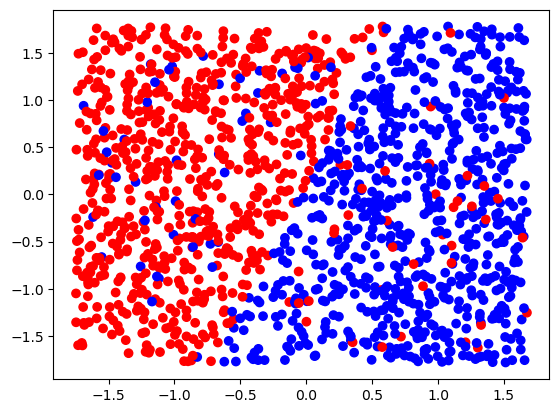

Visualizing DF2:


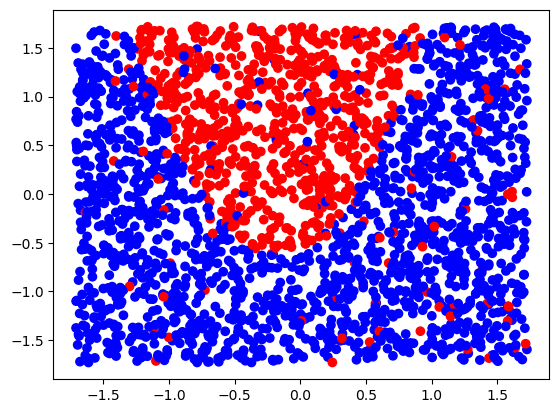

Visualizing DF3:


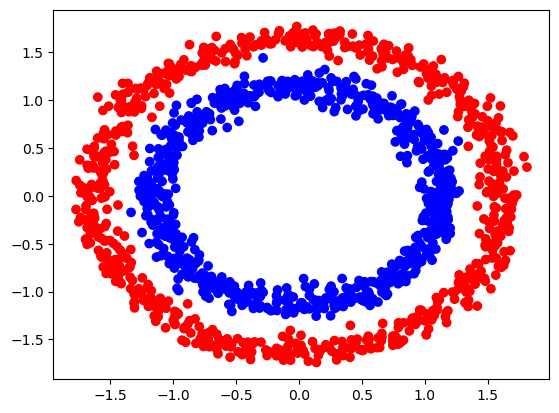

In [58]:
import matplotlib.pyplot as plt
import pandas as pd

def visualize_data(X, y):
    col = []
    for i in range(len(y)):
        if y[i] == 1:
            col.append('red')
        else:
            col.append('blue')
    plt.scatter(X[:, 0], X[:, 1], color=col)
    plt.show()


## Visualize the data
print("Visualizing DF1:")
visualize_data(X1, y1)

print("Visualizing DF2:")
visualize_data(X2, y2)

print("Visualizing DF3:")
visualize_data(X3, y3)

**Theoretical Question:**

Which kernel will you use for each dataset? Justify your answer.

Note: your implementation must follow your choice here. Otherwise, you do not recieve any points for your implemetation.

<font color='green'>Write down your answers as markdown here.</font>

### DF1
Kernel: Linear Kernel
 accuarcy = 0.922

Justification:

linear kernel is better for this Data frame than others and as we can see the datas ara leneary seperable

### DF2
Kernel: RBF Kernel  
accuracy:0.95

Justification:
The polynomial kernel of degree 2 do better on DF3 so we pick up RBF for DF2 
but as we can see data distrubated like a guassian function 

### DF3

Kernel: Polynomial Kernel of degree 2

accuracy:0.997

Justification:
as we can see the datas are  like a circules so the feature transform (1,$x_1^2$,$x_2^2$) can makes data lineary seperable thats equal to polynomial kernel



## Dataset one (DF1.csv)

Split the dataset into train and test sets (20 percent for test). Use 42 as the random state and do not forget to scale the data.

In [59]:
df1 = pd.read_csv('DF1.csv')

# Split the dataset into train and test sets
X = df1.iloc[:, :-1].values
y = df1.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Use CVXPY to solve the dual problem with the appropriate kernel using the training set.

In [115]:
def nearestPD(A):
    B = (A + A.T) / 2
    E, V = np.linalg.eig(B)
    E[E < 0] = 0
    return V @ np.diag(E) @ V.T

C = 1.0
def linear_kernel(x, z):
    return x@(z.T)
N1, N2, N3 = len(y1_train), len(y2_train), len(y3_train)
alpha1 = cp.Variable(N1)
kernel1 = lambda x, z: linear_kernel(x, z)
Y1=np.diag(np.diag(np.diag(y_train)))
#Xhat=Y1@ X_train
#S=Xhat@Xhat.T
S=np.zeros((N1,N1))
for i in range(N1):
    for j in range(N1):
        S[i,j]=y_train[i]*y_train[j]*linear_kernel(X_train[i,:],X_train[j,:])
S=nearestPD(S)
print(alpha1.shape)
print(np.all(np.linalg.eigvals(S) >= 0))

prob1 = cp.Problem(cp.Maximize(cp.sum(alpha1) - 0.5*cp.quad_form(alpha1,S)),
                  [0 <= alpha1, cp.sum(cp.multiply(alpha1, y_train)) == 0, alpha1 <= C])
prob1.solve()
w1 = np.sum(alpha1.value * y1_train[:, None] * X1_train, axis=0)
b1 = np.mean(y1_train - np.dot(X1_train, w1))

(1180,)
False


363.54386811658856

In [127]:
print('alphas: ',alpha1.value)
w1=np.zeros(2)
for i in range (N1):
    w1 += alpha1.value[i] * y1_train[i] * X1_train[i]
print('w1 :', w1)
b1 = np.mean(y1_train - np.dot(X1_train, w1))
print('b1 :', b1)

alphas:  [ 1.00000000e+00 -2.03099872e-20  2.60557099e-20 ...  1.00000000e+00
 -3.22841607e-20 -1.15537629e-20]
w1 : [-2.118429    0.57371535]
b1 : -0.027637170792081975


Predict the class of each entry in the test set using your learned model.

In [128]:
def classify(X, w, b):
    return np.sign(np.dot(X, w) + b)
# Predict the class of each entry in the test set for DF1
y_pred1 = classify(X1_test, w1, b1)


Use classification_report function (from sklearn) to get the accuracy of your model.

In [129]:
from sklearn.metrics import classification_report

# Calculate the accuracy for DF1
print("Classification Report for DF1:")
print(classification_report(y1_test, y_pred1))

Classification Report for DF1:
              precision    recall  f1-score   support

          -1       0.92      0.91      0.92       148
           1       0.91      0.93      0.92       148

    accuracy                           0.92       296
   macro avg       0.92      0.92      0.92       296
weighted avg       0.92      0.92      0.92       296



## Dataset two (DF2.csv)

Split the dataset into train and test sets (20 percent for test). Use 42 as the random state and do not forget to scale the data.

In [238]:
df2 = pd.read_csv('DF2.csv')

# Split the dataset into train and test sets
X = df2.iloc[:, :-1].values
y = df2.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Use CVXPY to solve the dual problem with the appropriate kernel using the training set.

In [239]:

C = 1.0
def rbf_kernel(x, z):
    sigma=1
    return np.exp(-np.linalg.norm(x - z) ** 2 / (2 * sigma ** 2))

alpha2 = cp.Variable(N2)
S=np.zeros((N2,N2))
for i in range(N2):
    for j in range(N2):
        S[i,j]=y_train[i]*y_train[j]*rbf_kernel(X_train[i,:],X_train[j,:])

prob2 = cp.Problem(cp.Maximize(cp.sum(alpha2) - 0.5*cp.quad_form(alpha2,cp.psd_wrap(S))),
                  [0 <= alpha2, cp.sum(cp.multiply(alpha2, y_train)) == 0, alpha2 <= C])
prob2.solve()

428.6692243556229

In [240]:
print('alphas: ',alpha2.value)
w2=np.zeros(2)
for i in range (N2):
    w2 += alpha2.value[i] * y_train[i] * X_train[i]
print('w2 :', w2)
def get_b2( X,Y,alpha,N):
    b=0
    s=0
    for j in range(N):
        b+=Y[j]
        for i in range(N):
            b-=alpha[i]*Y[i]*rbf_kernel(X[i],X[j])
    
    for u in range(len(alpha)):
        if(alpha[u]!=0):
            s+=1
        
    return b/s

b2=get_b2( X_train,y_train,alpha2.value,N2)
print('b2 :', b2)



alphas:  [-1.17307555e-07  1.00000034e+00 -1.14896130e-06 ... -1.42041454e-07
  8.91994539e-07  9.91743083e-07]
w2 : [2.81792978 2.57471678]
b2 : -0.6035231769818651


Predict the class of each entry in the test set using your learned model.

In [241]:
def classify(X, X1,Y1, b,alpha,N):
    Np=len(X)
    
    y=np.zeros(Np)
    for j in range(Np):
        cache=b
        for i in range(N):
            cache+=alpha[i]*Y1[i]*rbf_kernel(X1[i], X[j])
        y[j]=np.sign(cache)
    return y
# Predict the class of each entry in the test set for DF3
y_pred = classify(X_test, X_train,y_train, b2,alpha2.value,N2)
print(y_pred)
print(y_test)



[-1. -1. -1. -1. -1. -1.  1. -1.  1. -1.  1.  1. -1. -1. -1. -1. -1. -1.
 -1.  1. -1. -1. -1. -1.  1. -1. -1. -1.  1.  1. -1.  1.  1.  1. -1.  1.
  1.  1. -1. -1. -1.  1. -1.  1. -1. -1.  1. -1.  1. -1. -1. -1. -1.  1.
 -1.  1. -1.  1.  1.  1.  1.  1.  1. -1.  1. -1. -1. -1.  1.  1.  1. -1.
 -1. -1.  1.  1.  1. -1.  1. -1. -1. -1. -1.  1. -1. -1.  1. -1.  1. -1.
 -1. -1.  1. -1. -1.  1. -1.  1. -1.  1.  1.  1. -1. -1. -1. -1. -1.  1.
 -1. -1. -1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1. -1. -1. -1.
 -1.  1.  1. -1.  1.  1.  1.  1. -1. -1. -1. -1.  1. -1.  1. -1.  1. -1.
 -1. -1. -1.  1. -1.  1.  1.  1.  1. -1. -1.  1.  1. -1. -1. -1. -1. -1.
  1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1. -1.  1.  1.  1.  1.  1. -1.
 -1. -1. -1. -1. -1. -1.  1. -1. -1. -1.  1. -1.  1. -1.  1. -1. -1. -1.
 -1. -1. -1.  1. -1. -1. -1. -1.  1.  1. -1.  1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1.  1. -1. -1.  1. -1.  1. -1. -1. -1.  1. -1. -1. -1. -1.  1.
 -1. -1. -1. -1. -1. -1. -1.  1.  1. -1. -1. -1. -1

Use classification_report function (from sklearn) to get the accuracy of your model.

In [242]:
from sklearn.metrics import classification_report

# Calculate the accuracy for DF1
print("Classification Report for DF2:")
print(classification_report(y_test, y_pred))

Classification Report for DF2:
              precision    recall  f1-score   support

          -1       0.94      0.93      0.94       336
           1       0.87      0.88      0.87       160

    accuracy                           0.92       496
   macro avg       0.90      0.91      0.91       496
weighted avg       0.92      0.92      0.92       496



## Dataset three (DF3.csv)

Split the dataset into train and test sets (20 percent for test). Use 42 as the random state and do not forget to scale the data.

In [223]:
df3 = pd.read_csv('DF3.csv')

# Split the dataset into train and test sets
X = df3.iloc[:, :-1].values
y = df3.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Use CVXPY to solve the dual problem with the appropriate kernel using the training set.

In [228]:

def polynomial_kernel(x, z):
    return (1 + x@z.T) ** 2


C = 1.0

alpha3 = cp.Variable(N3)
S=np.zeros((N3,N3))
for i in range(N3):
    for j in range(N3):
        S[i,j]=y_train[i]*y_train[j]*polynomial_kernel(X_train[i,:],X_train[j,:])

prob3 = cp.Problem(cp.Maximize(cp.sum(alpha3) - 0.5*cp.quad_form(alpha3,cp.psd_wrap(S))),
                  [0 <= alpha3, cp.sum(cp.multiply(alpha3, y_train)) == 0, alpha3 <= C])
prob3.solve()

28.69420488876648

Predict the class of each entry in the test set using your learned model.

In [232]:
print('alphas: ',alpha3.value)
w3=np.zeros(2)
for i in range (N3):
    w3 += alpha3.value[i] * y3_train[i] * X3_train[i]
print('w3 :', w3)
def get_b3( X,Y,alpha,N):
    b=0
    s=0
    for j in range(N):
        b+=Y[j]
        for i in range(N):
            b-=alpha[i]*Y[i]*polynomial_kernel(X[i],X[j])
    
    for u in range(len(alpha)):
        if(alpha[u]!=0):
            s+=1
        
    return b/s

b3=get_b3( X_train,y_train,alpha3.value,N3)
print('b3 :', b3)

alphas:  [ 4.92662099e-07 -1.50788660e-07  5.50031756e-06 ...  4.73120037e-08
 -1.25817527e-06  9.99996538e-01]
w3 : [0.08477916 0.01409822]
b3 : -7.211379374665478


In [237]:
def classify(X, X1,Y1, b,alpha,N):
    Np=len(X)
    
    y=np.zeros(Np)
    for j in range(Np):
        cache=b
        for i in range(N):
            cache+=alpha[i]*Y1[i]*polynomial_kernel(X1[i], X[j])
        y[j]=np.sign(cache)
    return y
# Predict the class of each entry in the test set for DF3
y_pred = classify(X_test, X_train,y_train, b3,alpha3.value,N3)
print(y_pred)
print(y_test)



[ 1.  1.  1. -1. -1. -1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1.  1. -1. -1.  1. -1. -1.  1.  1. -1. -1. -1. -1. -1.  1. -1.  1. -1.
 -1. -1. -1. -1. -1. -1.  1.  1. -1. -1.  1.  1.  1. -1. -1.  1. -1.  1.
  1.  1. -1. -1. -1. -1.  1.  1.  1. -1. -1.  1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1.  1. -1. -1. -1.  1.  1.  1.  1. -1.  1.  1. -1. -1.
 -1. -1. -1.  1.  1. -1. -1.  1. -1.  1.  1.  1. -1. -1.  1. -1. -1. -1.
  1.  1.  1.  1. -1.  1.  1. -1. -1. -1. -1.  1. -1.  1. -1.  1. -1. -1.
 -1. -1.  1. -1.  1. -1.  1.  1.  1. -1. -1. -1. -1. -1.  1.  1. -1. -1.
 -1.  1. -1.  1. -1. -1.  1.  1. -1.  1.  1. -1.  1.  1. -1.  1.  1.  1.
 -1. -1. -1. -1.  1.  1.  1.  1.  1. -1.  1. -1. -1.  1.  1.  1.  1. -1.
  1. -1. -1.  1. -1. -1. -1.  1.  1. -1.  1.  1. -1. -1.  1.  1.  1. -1.
  1.  1. -1.  1. -1.  1. -1.  1.  1.  1.  1. -1.  1.  1.  1.  1.  1.  1.
 -1.  1.  1.  1. -1.  1. -1.  1.  1. -1. -1.  1.  1. -1. -1.  1. -1.  1.
  1. -1.  1.  1.  1.  1.  1.  1. -1. -1.  1.  1. -1

Use classification_report function (from sklearn) to get the accuracy of your model.

In [235]:
from sklearn.metrics import classification_report

# Calculate the accuracy for DF1
print("Classification Report for DF3:")
print(classification_report(y_test, y_pred))

Classification Report for DF3:
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       152
           1       1.00      1.00      1.00       140

    accuracy                           1.00       292
   macro avg       1.00      1.00      1.00       292
weighted avg       1.00      1.00      1.00       292

